# Dow-Jones Index Explanatory Data Analysis


In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from IPython import display
import time
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import tkinter
import pylab as pl
from sklearn.cluster import AgglomerativeClustering
from matplotlib.backends.backend_tkagg import (
    FigureCanvasTkAgg, NavigationToolbar2Tk)
from sklearn.cluster import KMeans
# Implement the default Matplotlib key bindings.
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure
from sklearn.neighbors import KernelDensity
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['figure.figsize'] = [4.5, 3.5]
#plt.rcParams['figure.dpi'] = 100



%matplotlib inline
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings('ignore')

In [133]:
df = pd.read_csv("../datasets/dow_jones_index/dow_jones_index.data")
# print first 10 houses
df.head(10)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.792670,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,$17.33,$17.48,$16.97,$17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,-0.632547,90,0.172712
6,1,AA,2/18/2011,$17.39,$17.68,$17.28,$17.28,80023895,-0.632547,-30.226696,114691279.0,$16.98,$16.68,-1.766780,83,0.173611
7,1,AA,2/25/2011,$16.98,$17.15,$15.96,$16.68,132981863,-1.766780,66.177694,80023895.0,$16.81,$16.58,-1.368230,76,0.179856
8,1,AA,3/4/2011,$16.81,$16.94,$16.13,$16.58,109493077,-1.368230,-17.663150,132981863.0,$16.58,$16.03,-3.317250,69,0.180941
9,1,AA,3/11/2011,$16.58,$16.75,$15.42,$16.03,114332562,-3.317250,4.419900,109493077.0,$15.95,$16.11,1.003130,62,0.187149


In [134]:
df["date"] = pd.to_datetime(df["date"])
df["open"] = df["open"].replace("[\$,]", "", regex=True).astype(float)
df["high"] = df["high"].replace("[\$,]", "", regex=True).astype(float)
df["low"] = df["low"].replace("[\$,]", "", regex=True).astype(float)
df["close"] = df["close"].replace("[\$,]", "", regex=True).astype(float)

In [135]:
msft = df[df["stock"] == "MSFT"]
csco = df[df["stock"] == "CSCO"]
ibm = df[df["stock"] == "IBM"]
wmt = df[df["stock"] == "WMT"]
mcd = df[df["stock"] == "MCD"]
jpm = df[df["stock"] == "JPM"]

Text(0, 0.5, 'Price')

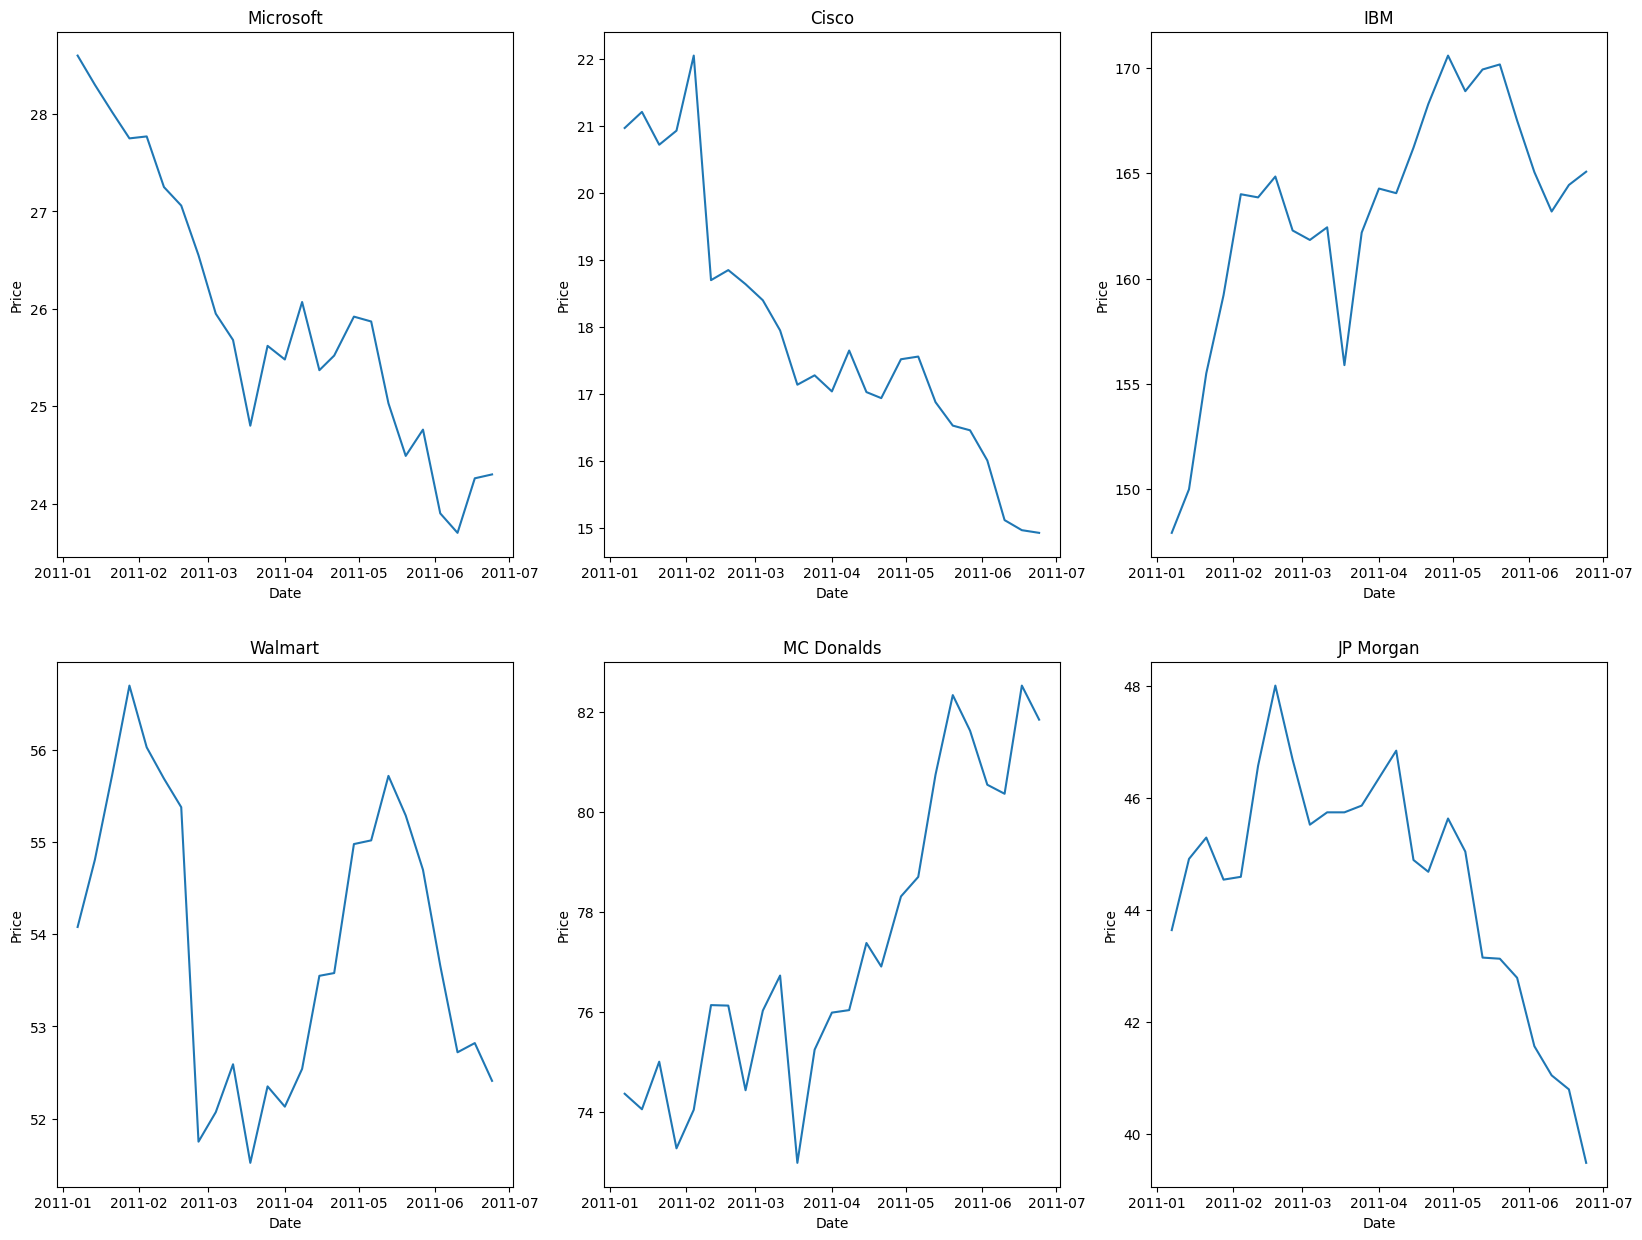

In [136]:
fig, ax = plt.subplots(2, 3, figsize=(20, 15))
ax[0, 0].plot(msft["date"], msft["close"])
ax[0, 0].set_title("Microsoft")
ax[0, 0].set_xlabel("Date")
ax[0, 0].set_ylabel("Price")

ax[0, 1].plot(csco["date"], csco["close"])
ax[0, 1].set_title("Cisco")
ax[0, 1].set_xlabel("Date")
ax[0, 1].set_ylabel("Price")

ax[0, 2].plot(ibm["date"], ibm["close"])
ax[0, 2].set_title("IBM")
ax[0, 2].set_xlabel("Date")
ax[0, 2].set_ylabel("Price")

ax[1, 0].plot(wmt["date"], wmt["close"])
ax[1, 0].set_title("Walmart")
ax[1, 0].set_xlabel("Date")
ax[1, 0].set_ylabel("Price")

ax[1, 1].plot(mcd["date"], mcd["close"])
ax[1, 1].set_title("MC Donalds")
ax[1, 1].set_xlabel("Date")
ax[1, 1].set_ylabel("Price")

ax[1, 2].plot(jpm["date"], jpm["close"])
ax[1, 2].set_title("JP Morgan")
ax[1, 2].set_xlabel("Date")
ax[1, 2].set_ylabel("Price")

Text(0, 0.5, 'Volume')

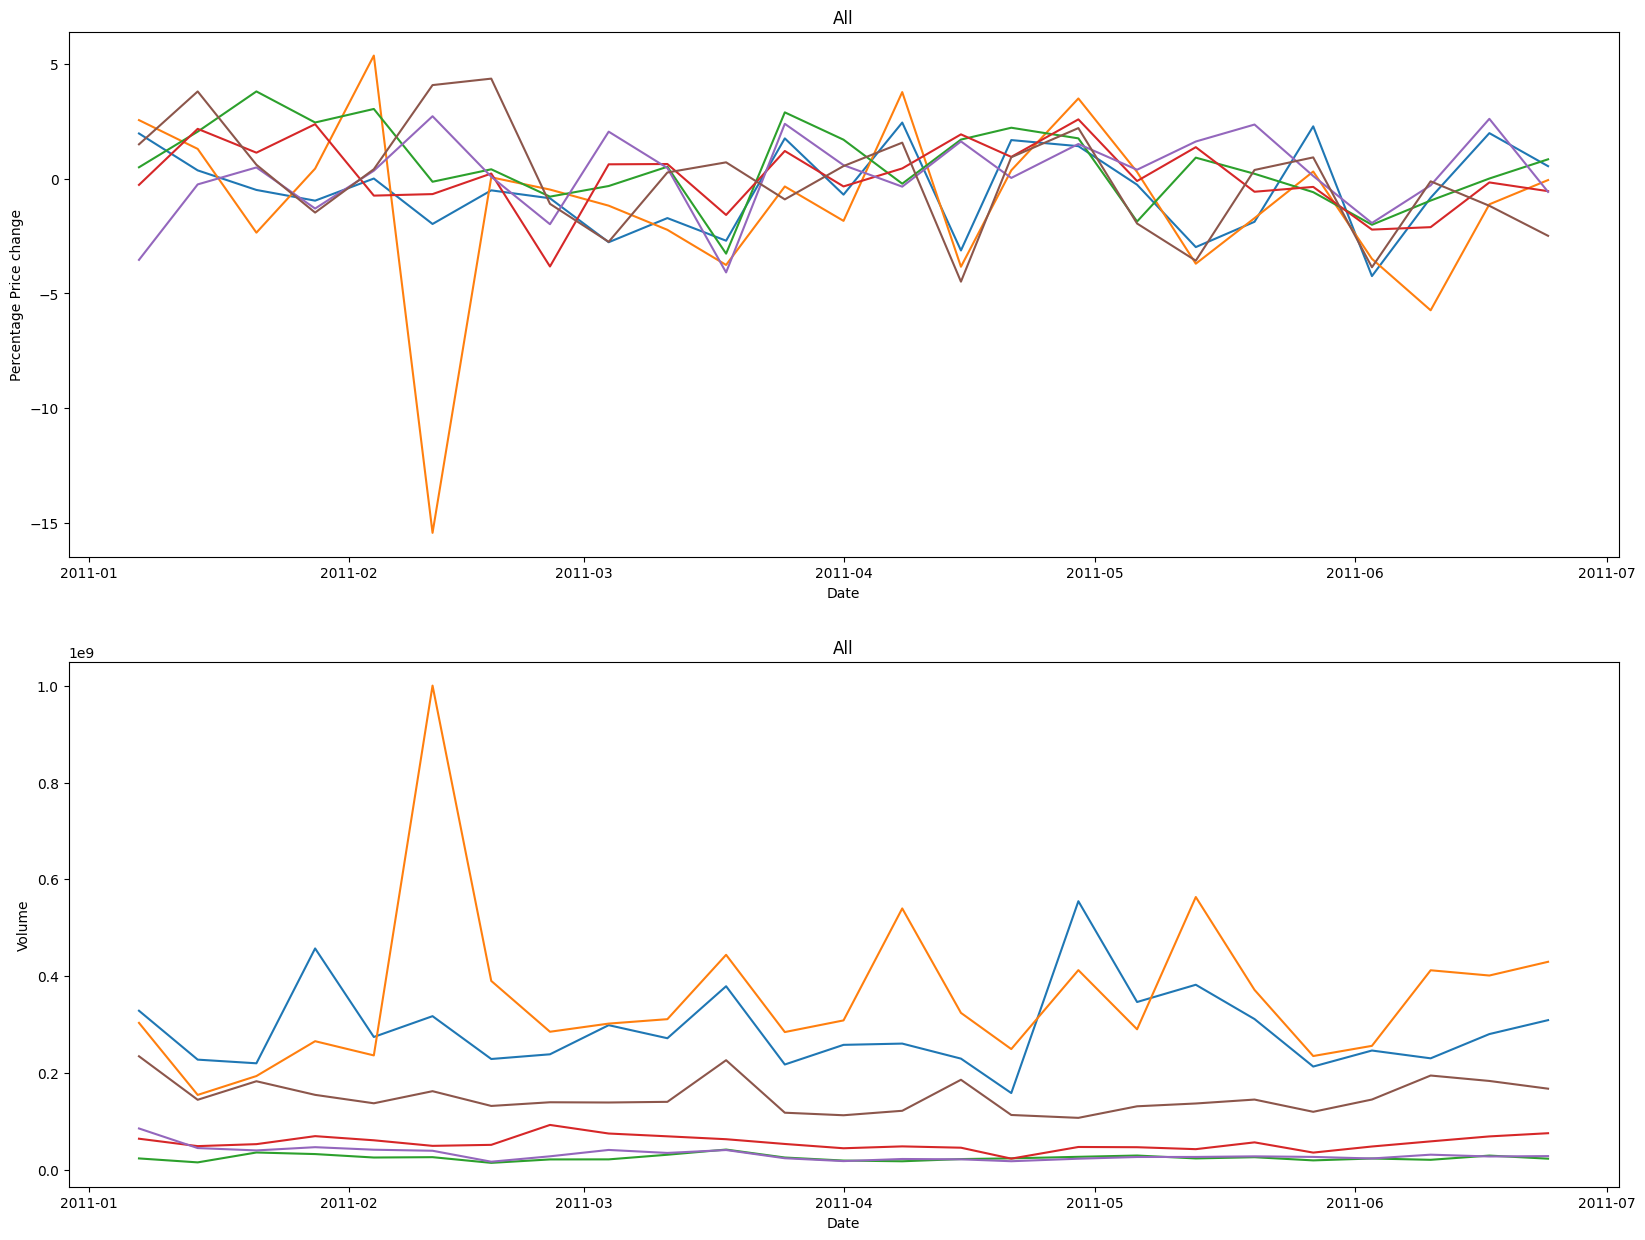

In [137]:
fig, ax = plt.subplots(2, 1, figsize=(20, 15))
ax[0].plot(msft["date"], msft["percent_change_price"])
ax[0].plot(csco["date"], csco["percent_change_price"])
ax[0].plot(ibm["date"], ibm["percent_change_price"])
ax[0].plot(wmt["date"], wmt["percent_change_price"])
ax[0].plot(mcd["date"], mcd["percent_change_price"])
ax[0].plot(jpm["date"], jpm["percent_change_price"])
ax[0].set_title("All")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Percentage Price change")


ax[1].plot(msft["date"], msft["volume"])
ax[1].plot(csco["date"], csco["volume"])
ax[1].plot(ibm["date"], ibm["volume"])
ax[1].plot(wmt["date"], wmt["volume"])
ax[1].plot(mcd["date"], mcd["volume"])
ax[1].plot(jpm["date"], jpm["volume"])
ax[1].set_title("All")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Volume")

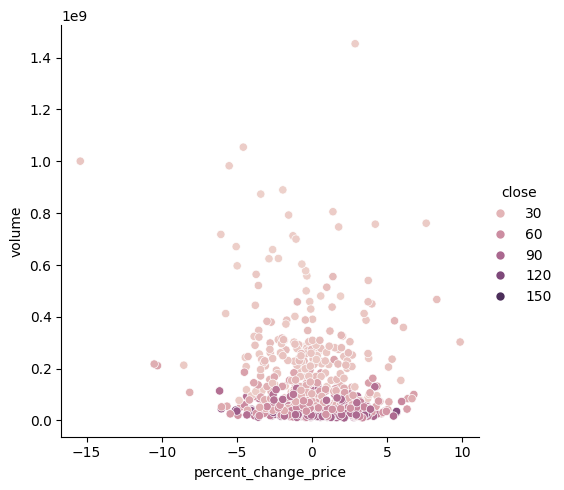

In [138]:
sns.relplot(data=df, x="percent_change_price", y="volume", hue="close")

<Axes: >

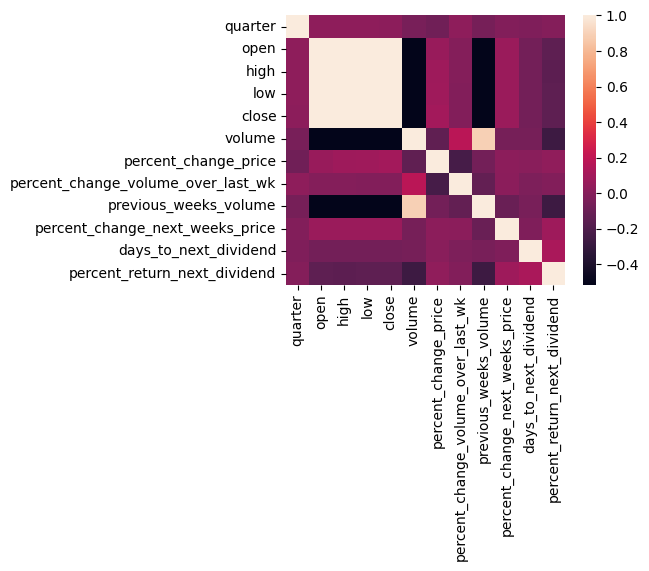

In [139]:
sns.heatmap(df.corr(numeric_only=True))

Text(0, 0.5, 'Volume')

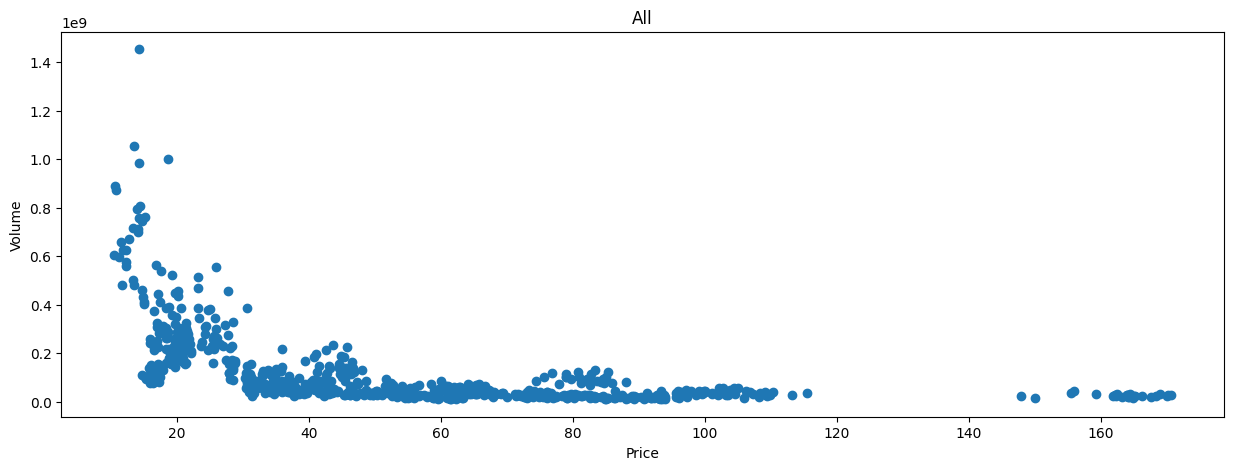

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.scatter(df["close"], df["volume"])
ax.set_title("All")
ax.set_xlabel("Price")
ax.set_ylabel("Volume")

Text(0, 0.5, 'Volume')

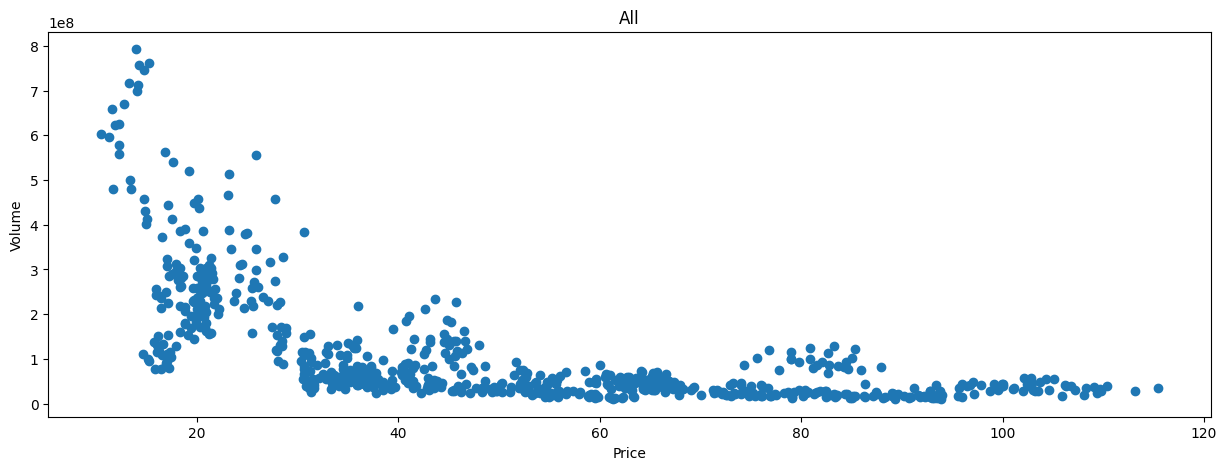

In [141]:
corr_df = df[(df["close"] < 120) & (df["volume"] < 800000000)]

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.scatter(corr_df["close"], corr_df["volume"])
ax.set_title("All")
ax.set_xlabel("Price")
ax.set_ylabel("Volume")

Text(0, 0.5, 'Price')

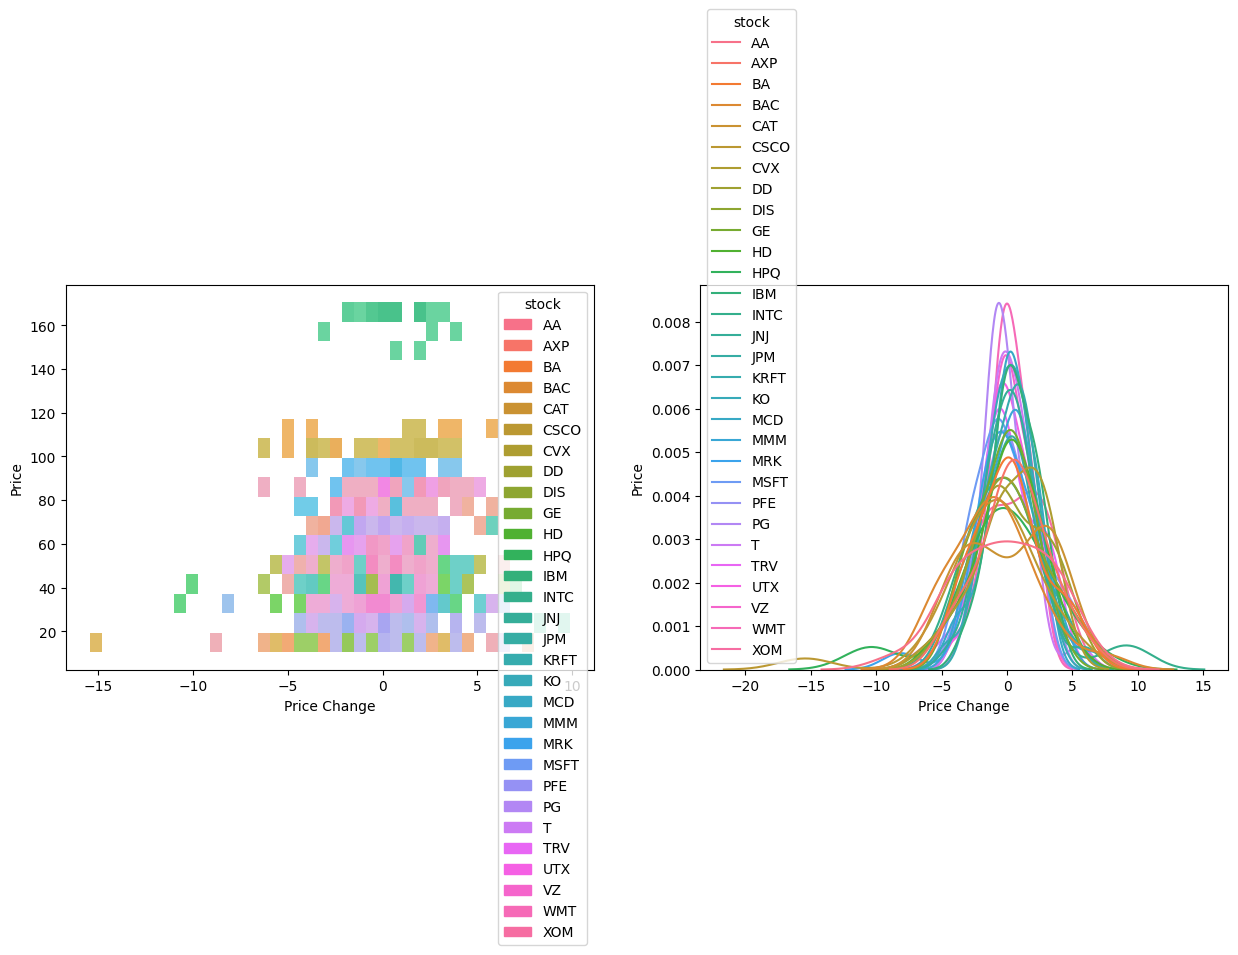

In [142]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=df, x="percent_change_price", y="close", hue="stock", ax=ax[0])
ax[0].set_xlabel("Price Change")
ax[0].set_ylabel("Price")

sns.kdeplot(data=df, x="percent_change_price", hue="stock", ax=ax[1])
ax[1].set_xlabel("Price Change")
ax[1].set_ylabel("Price")

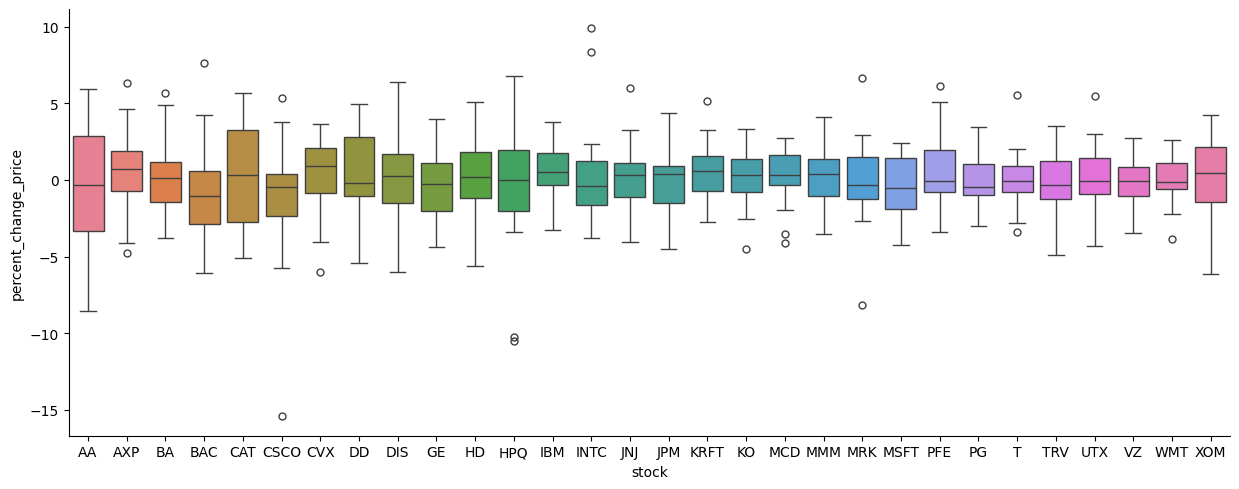

In [143]:
sns.catplot(
    data=df, x="stock", y="percent_change_price", kind="box", hue="stock", aspect=2.5
)

# Clustering


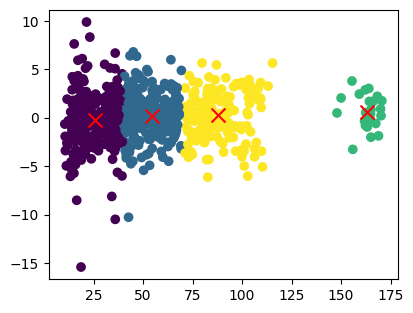

In [168]:
X = df[["close", "percent_change_price"]].values
n_clusters = 4
random_state = 2
kmeans_iters = 10
kmeans = KMeans(
    n_clusters=n_clusters,
    random_state=random_state,
    n_init=1,
    max_iter=kmeans_iters,
    init="random",
).fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker="x",
    c="r",
    s=100,
)

## Elbow


Text(0, 0.5, 'SSE')

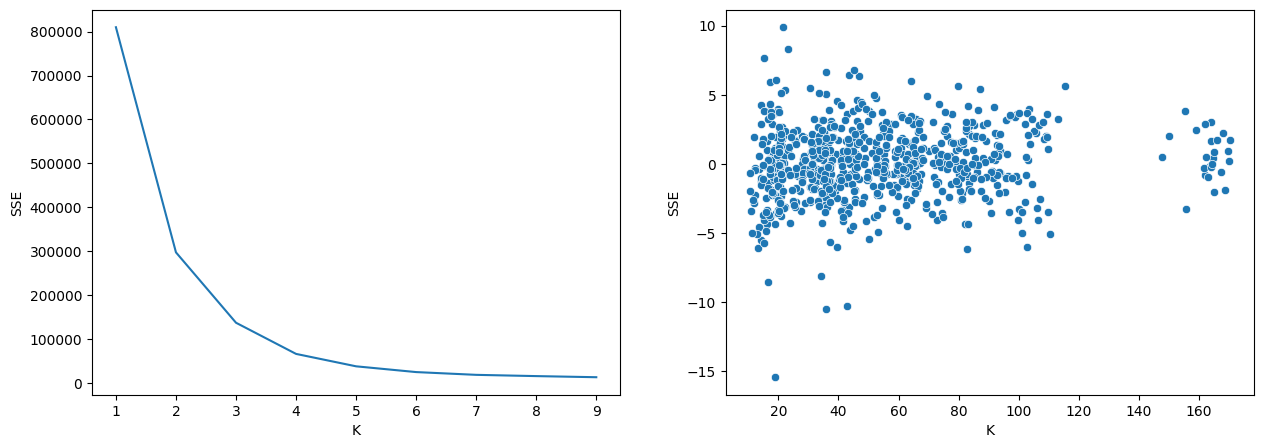

In [169]:
sse = {}
for k in range(1, kmeans_iters):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)
    sse[k] = kmeans.inertia_

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(data=sse, ax=ax[0])
ax[0].set_xlabel("K")
ax[0].set_ylabel("SSE")

sns.scatterplot(x=X[:, 0], y=X[:, 1], ax=ax[1])
ax[1].set_xlabel("K")
ax[1].set_ylabel("SSE")

<Axes: >

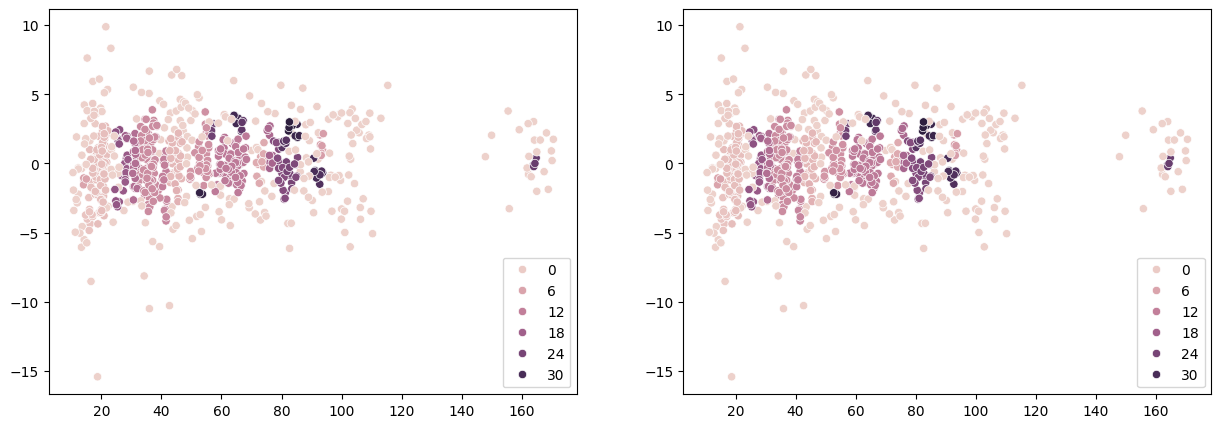

In [171]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], ax=ax[0], hue=y_pred)

y_pred = DBSCAN(eps=1, min_samples=4).fit_predict(X)
sns.scatterplot(x=X[:, 0], y=X[:, 1], ax=ax[1], hue=y_pred)